In [61]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    precision_recall_curve
)


In [4]:
# cargar dataset
train_data = pd.read_csv('/Users/angel/Library/Mobile Documents/com~apple~CloudDocs/maestria/8.Modelos predictivos/proyecto final/python compresor/metropt+3+dataset/MetroPT3(AirCompressor).csv')
df = pd.DataFrame(train_data)
df

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,15169430,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516944,15169440,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516945,15169450,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516946,15169460,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [5]:
#agregamos columna failure
df['failure'] = 0
df

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,failure
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,15169430,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516944,15169440,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516945,15169450,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516946,15169460,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


In [6]:
# El  dataset nos menciona unos tiempos donde ocurrieron fallos, definimos estas lineas en la columna de fallo como 1
df['timestamp'] = pd.to_datetime(df['timestamp'])
start_timestamp_1 = pd.to_datetime('2020-04-18 00:00:00')
end_timestamp_1 = pd.to_datetime('2020-04-18 23:59:00')
start_timestamp_2 = pd.to_datetime('2020-05-29 23:30:00')
end_timestamp_2= pd.to_datetime('2020-05-30 06:00:00')
start_timestamp_3 = pd.to_datetime('2020-06-05 10:00:00')
end_timestamp_3 = pd.to_datetime('2020-06-07 14:30:00')
start_timestamp_4 = pd.to_datetime('2020-07-15 14:30:00')
end_timestamp_4 = pd.to_datetime('2020-07-15 19:00:00')
j=0
for i in df["timestamp"]:
  if (((i >= start_timestamp_1) and (i <= end_timestamp_1)) or ((i >= start_timestamp_2) and (i <= end_timestamp_2)) or ((i >= start_timestamp_3) and (i <= end_timestamp_3)) or ((i >= start_timestamp_4) and (i <= end_timestamp_4))):
    df.at[j, 'failure'] = 1
  j+=1
  
#revision de valores
Failure_df = df[df['failure'] == 1]
Failure_df

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,failure
562564,5625640,2020-04-18 00:00:01,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
562565,5625650,2020-04-18 00:00:13,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
562566,5625660,2020-04-18 00:00:24,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
562567,5625670,2020-04-18 00:00:36,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
562568,5625680,2020-04-18 00:00:49,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172710,11727100,2020-07-15 18:59:20,-0.004,8.846,8.832,-0.008,8.848,73.650,3.5600,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1172711,11727110,2020-07-15 18:59:30,-0.006,8.816,8.800,-0.010,8.818,73.600,3.5575,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1172712,11727120,2020-07-15 18:59:40,-0.004,8.784,8.770,-0.008,8.788,73.500,3.6325,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1172713,11727130,2020-07-15 18:59:50,-0.006,8.754,8.738,-0.008,8.758,73.325,3.5475,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1


In [7]:
# tipos de columnas
df.dtypes

Unnamed: 0                  int64
timestamp          datetime64[ns]
TP2                       float64
TP3                       float64
H1                        float64
DV_pressure               float64
Reservoirs                float64
Oil_temperature           float64
Motor_current             float64
COMP                      float64
DV_eletric                float64
Towers                    float64
MPG                       float64
LPS                       float64
Pressure_switch           float64
Oil_level                 float64
Caudal_impulses           float64
failure                     int64
dtype: object

In [8]:
# si hay valores faltantes
df.isnull().sum()

Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
failure            0
dtype: int64

In [129]:
# Resumen estadistico
df.describe()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,failure
count,1.516948e+06,1516948,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,7.584735e+06,2020-05-16 22:58:36.631517184,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01,1.974623e-02
min,0.000000e+00,2020-02-01 00:00:00,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.792368e+06,2020-03-23 05:05:04.500000,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,7.584735e+06,2020-05-17 08:07:06,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
75%,1.137710e+07,2020-07-10 03:07:27.500000,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,1.516947e+07,2020-09-01 03:59:50,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
std,4.379053e+06,NaN,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01,1.391270e-01


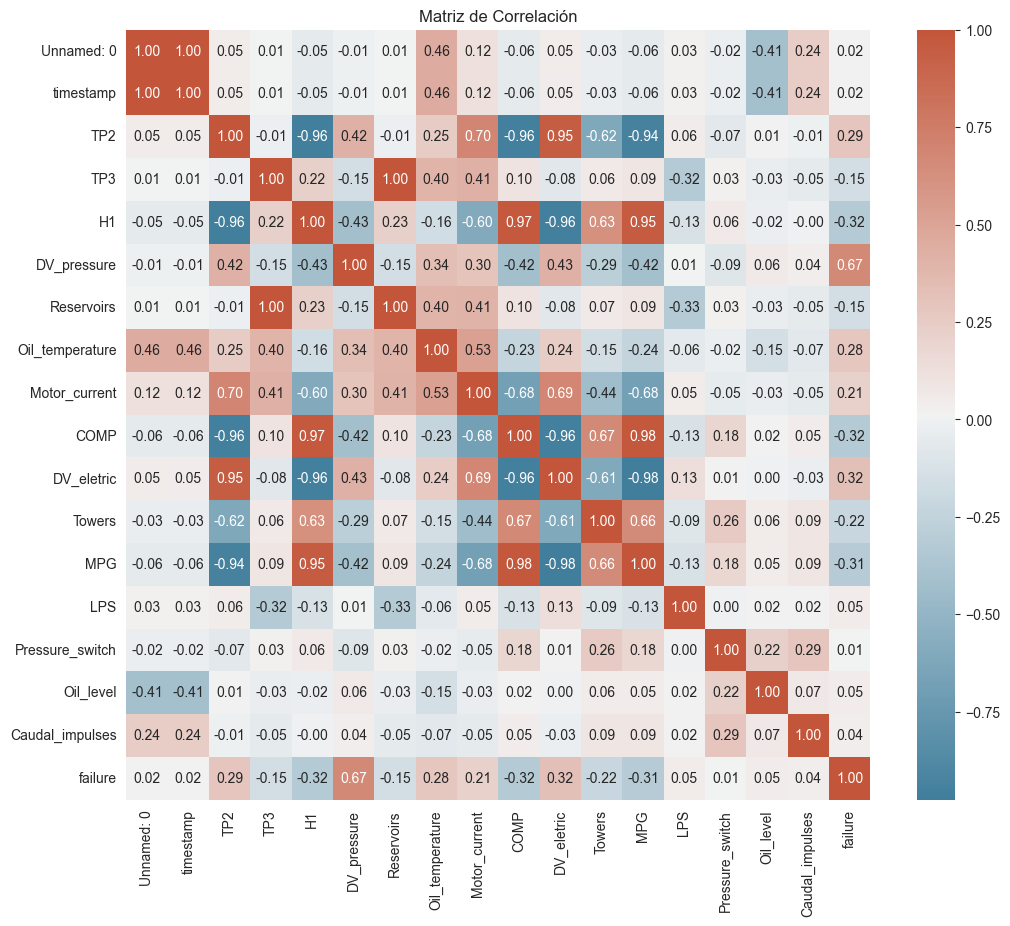

In [10]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Mostrar la matriz de correlación como mapa de calor
plt.figure(figsize=(12,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(correlation_matrix, annot=True, cmap=cmap , fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

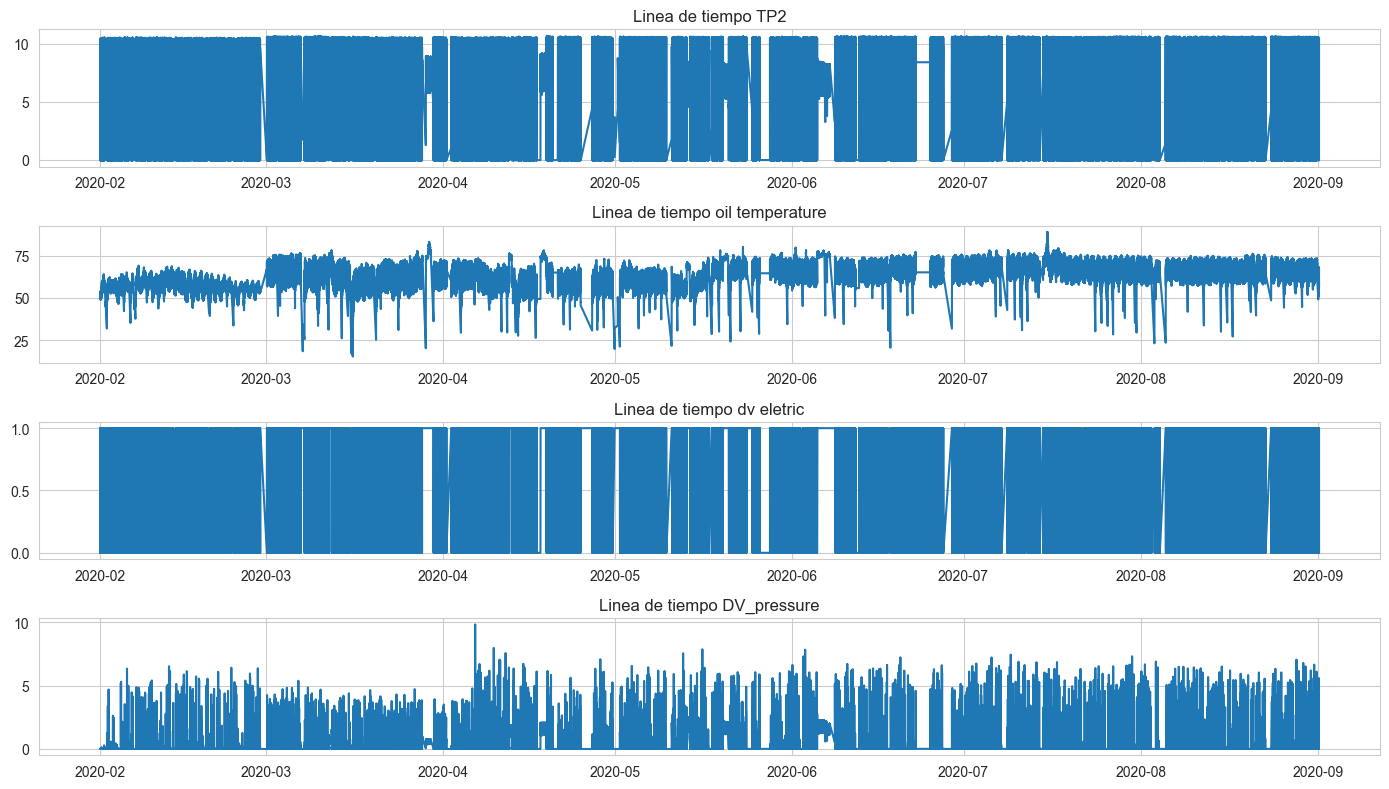

In [11]:
# grafico tiempo TP2, TP3,H1 y Dv pressure
plt.figure(figsize=(14, 8))

plt.subplot(4, 1, 1)
plt.plot(df['timestamp'], df['TP2'])
plt.title('Linea de tiempo TP2')

plt.subplot(4, 1, 2)
plt.plot(df['timestamp'], df['Oil_temperature'])
plt.title('Linea de tiempo oil temperature')

plt.subplot(4, 1, 3)
plt.plot(df['timestamp'], df['DV_eletric'])
plt.title('Linea de tiempo dv eletric')

plt.subplot(4, 1, 4)
plt.plot(df['timestamp'], df['DV_pressure'])
plt.title('Linea de tiempo DV_pressure')

plt.tight_layout()
plt.show()

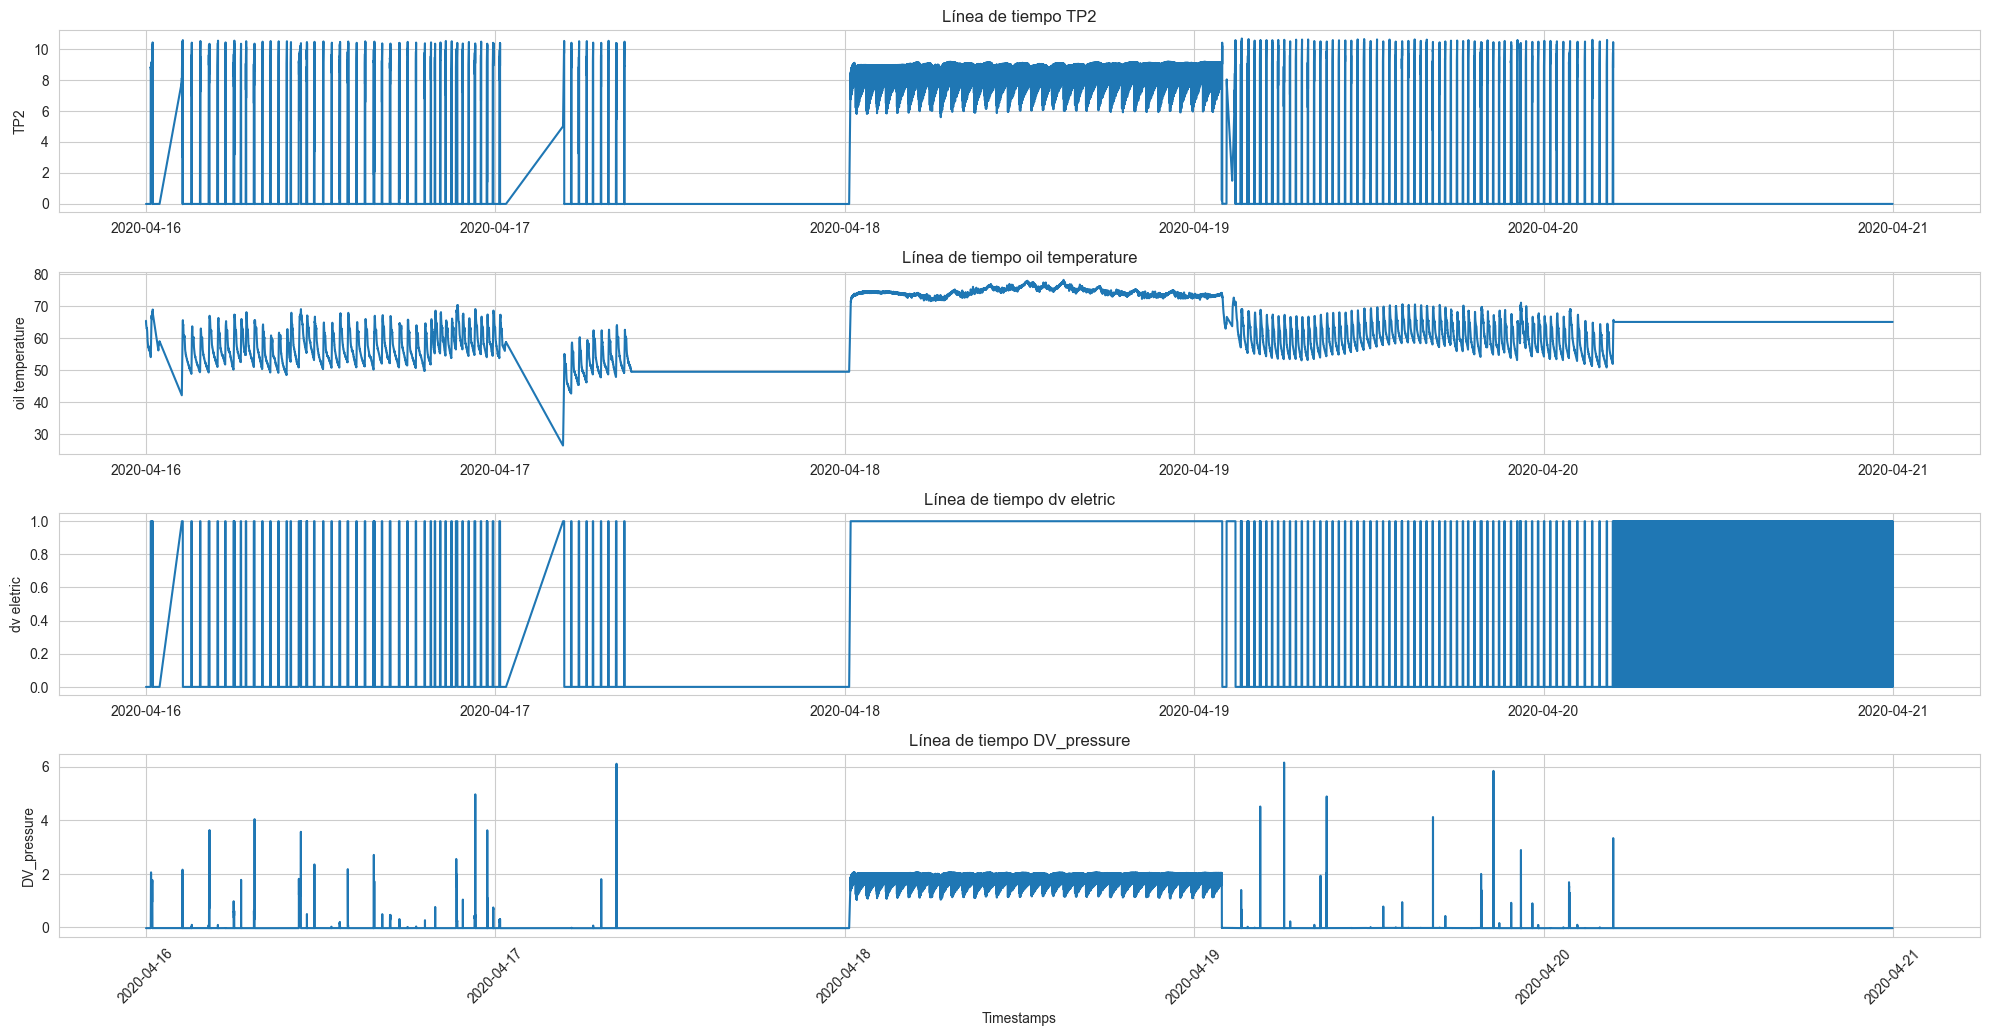

In [13]:
# Fechas de inicio y fin
start_timestamp_1 = pd.to_datetime('2020-04-16 00:00:00')
end_timestamp_1 = pd.to_datetime('2020-04-20 23:59:00')

df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filtrar por el rango de tiempo
df_filtered = df[(df['timestamp'] >= start_timestamp_1) & (df['timestamp'] <= end_timestamp_1)]

# Crear subplots
plt.figure(figsize=(20, 10))

plt.subplot(4, 1, 1)
plt.plot(df_filtered['timestamp'], df_filtered['TP2'])
plt.title("Línea de tiempo TP2")
plt.ylabel("TP2")

plt.subplot(4, 1, 2)
plt.plot(df_filtered['timestamp'], df_filtered['Oil_temperature'])
plt.title("Línea de tiempo oil temperature")
plt.ylabel("oil temperature")

plt.subplot(4, 1, 3)
plt.plot(df_filtered['timestamp'], df_filtered['DV_eletric'])
plt.title("Línea de tiempo dv eletric")
plt.ylabel("dv eletric")

plt.subplot(4, 1, 4)
plt.plot(df_filtered['timestamp'], df_filtered['DV_pressure'])
plt.title("Línea de tiempo DV_pressure")
plt.xlabel("Timestamps")
plt.ylabel("DV_pressure")

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()